Part Two - Comparing mRNA transcripts & protein isoforms of Human Cadherin-7 and inter-
pretting the consequences of alternate transcription (25 marks)*

- Task 1 - Perform pairwise sequence comparison between the longest and shortest human
Cadherin-7 alternate transcript sequences. Report your alignment results and explain what
you think they show (3 marks)

- Task 2 - Perform pairwise sequence comparison between the longest and shortest human
Cadherin-7 protein isoform sequences. Report your alignment results and explain what you
think they show (3 marks)

- Task 3 - How many exons does the human Cadherin-7 gene have and what are their lengths
(3 marks)

- Task 4 - Which exon(s) are missing from the shortest Cadherin-7 transcript compared to the
longest one? (2 marks)

- Task 5 - What difference do the missing parts of the protein from the shortest Cadherin-7
isoform compared to the longest make? (HINT you need to find out what the missing pieces
do) (4 marks)

up to 6 marks for including one additional piece of analysis.
up to 4 marks for exceptionally well organised and executed approach.

Possible extensions here might be to:
describe the the protein domains of Cadherin-7 relate the changes in sequence between the shortest and longest isoforms to their protein
structures, what’s different?
in addition to describing the difference the missing protein sequence makes also explain why
it makes the difference (HINT - look up single pass transmembrane proteins).

In [1]:
from Bio import Entrez
from Bio import SeqIO
from Bio import pairwise2 as pw
from Bio import AlignIO
from Bio import Align as al

Entrez.email = "s2055618@ed.ac.uk"

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


# task 1

In [2]:
# Task 1
# longest transcript = NM_001362438.2
# shortest transcript = NM_001317214.3

# What does this alignment mean?? Gonna use a website as this doesn't really mean anythign to me...

transcript_ids = ["NM_001362438.2", "NM_001317214.3"]

handle = Entrez.efetch(db="nucleotide", id=transcript_ids, rettype='fasta',retmode="text")
records = list(SeqIO.parse(handle, "fasta"))
handle.close()

print(records)

# use these as sequence objects
seq1 = records[0].seq
seq2 = records[1].seq

print(seq1)
print(seq2)
print("\n")

# perform a pairwise global alignment using the pam250 substitution matrix
mx = al.substitution_matrices.load('PAM250')

alignments = pw.align.globalds(seq1, seq2, mx, -10, -0.5)

# this tells us how many alignments have the same optimal score (pretty useful, think of cells with more than 
# one backtrace mark in the hand-drawn alignments)
print("number of alignments", len(alignments))

# in the result we can extract several score features

# the alignment score
print("alignment score", alignments[0][2])

# the start of the alignment (NB global alignments must always start at 0)
print("start of the alginment =", alignments[0][3])

# the end of the alignment
print("end of the alingment", alignments[0][4])

alignment_fasta = \
">"+records[0].name+" "+records[0].description+"\n"+alignments[0][0] \
+"\n"+ \
">"+records[1].name+" "+records[1].description+"\n"+alignments[0][1]

"""# write it to a file
fh = open('globin_alignment_pam250_global.fa','w')
fh.write(alignment_fasta)
fh.close()

# read in the file using AlignIO
alignment = AlignIO.read("/globin_alignment_pam250_global.fa", "fasta")

# convert to clustal
print(format(alignment,'clustal'))"""

# TODO: can also do pairwise on just the CDS region

[SeqRecord(seq=Seq('AGTCTGCCCCGCGCGCGGAGCTGCGCGCACTGGGTCCCCAAGAGCCCGCGGGCG...AAA'), id='NM_001362438.2', name='NM_001362438.2', description='NM_001362438.2 Homo sapiens cadherin 7 (CDH7), transcript variant d, mRNA', dbxrefs=[]), SeqRecord(seq=Seq('AGTCTGCCCCGCGCGCGGAGCTGCGCGCACTGGGTCCCCAAGAGCCCGCGGGCG...TTA'), id='NM_001317214.3', name='NM_001317214.3', description='NM_001317214.3 Homo sapiens cadherin 7 (CDH7), transcript variant c, mRNA', dbxrefs=[])]
AGTCTGCCCCGCGCGCGGAGCTGCGCGCACTGGGTCCCCAAGAGCCCGCGGGCGTCCGGCAGCCGAGCGCACGTTCTTTCGGATGCACACGCCCGGGTCCCTGGCGTCTGACGCCGTGGGGAGGGCAGCGAGGCCCCAGGTGAGTGTGTCTGCCTGCGCGGGGCTGGGGAGGCGCCGCTGGGCAGATGTGCGCCCTTGCTGTGCGCCTTTGGAAGCAGGACTAATCAGTGAGCGGAGAGCGGGCGGGGATGTCCGTGTGGAGTTTCCCTTGGCGTCCCCAAGTTACTGCGTGTTGCAGTGAGATGTGGCTCTGCAAGGCAGGACAGGCTTGTGGACGGAGGCGGGGGCGTTTGGCCCGGAAAGCCGGTGTTGACAGACACCAGGTGCGACACGAGGAGTAGTAGTTGAGGGTAAGAGCAAATCCCGGCACTCTCCAGGTGCAGCGGCAAACATGGGCAGGCTGGAGCACTCTCCTCAAAGAGGACCACAAGCAGGCTCCTCCCTCAACCTCGGACTGATGGGGGCACAACTCCGCGCCGGC

'# write it to a file\nfh = open(\'globin_alignment_pam250_global.fa\',\'w\')\nfh.write(alignment_fasta)\nfh.close()\n\n# read in the file using AlignIO\nalignment = AlignIO.read("/globin_alignment_pam250_global.fa", "fasta")\n\n# convert to clustal\nprint(format(alignment,\'clustal\'))'

In [4]:
# Using pairwise sequence alignment tool found @ https://www.ebi.ac.uk/Tools/psa/
# Specifically using Needle (EMBOSS)

########################################
# Program: needle
# Rundate: Thu 12 Oct 2023 15:01:41
# Commandline: needle
#    -auto
#    -stdout
#    -asequence emboss_needle-I20231012-150137-0193-3160880-p1m.asequence
#    -bsequence emboss_needle-I20231012-150137-0193-3160880-p1m.bsequence
#    -datafile EDNAFULL
#    -gapopen 10.0
#    -gapextend 0.5
#    -endopen 10.0
#    -endextend 0.5
#    -aformat3 pair
#    -snucleotide1
#    -snucleotide2
# Align_format: pair
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: EMBOSS_001
# 2: EMBOSS_001
# Matrix: EDNAFULL
# Gap_penalty: 10.0
# Extend_penalty: 0.5
#
# Length: 13131
# Identity:    3036/13131 (23.1%)
# Similarity:  3036/13131 (23.1%)
# Gaps:        9917/13131 (75.5%)
# Score: 11838.0
# 
#
#=======================================

# NOTE: COMPLETE ALIGNMENT FROM 1-136, FOLLOWED BY BIG GAP, THEN ALIGNMENT FROM 939-3001 WITH NO BREAKS, THEN LOTS OF LITTLE GAPS AND ALIGNMENTS OF 1-5, UNTIL THE SHORTER TRANSCRIPT 
# JUST ISNT LONG ENOUGH AND THERE ARE NO MORE MATCHES



In [9]:
transcript_ids = ["NM_001362438.2", "NM_001317214.3"]

# gb == genbank
handle = Entrez.efetch(db="nucleotide", id=transcript_ids, rettype="gb", retmode="text")
records = list(SeqIO.parse(handle, "genbank"))
handle.close()


for feature in records[0].features:
    if feature.type == "CDS":
        cds1 = feature.location.extract(records[0]).seq
        
for feature in records[1].features:
    if feature.type == "CDS":
        cds2 = feature.location.extract(records[1]).seq
        
print(cds1)
print(cds2, '\n')
        
# perform a pairwise global alignment using the pam250 substitution matrix
mx = al.substitution_matrices.load('PAM250')

alignments = pw.align.globalds(cds1, cds2, mx, -10, -0.5)

# this tells us how many alignments have the same optimal score (pretty useful, think of cells with more than 
# one backtrace mark in the hand-drawn alignments)
print("number of alignments", len(alignments))

# in the result we can extract several score features

# the alignment score
print("alignment score", alignments[0][2])

# the start of the alignment (NB global alignments must always start at 0)
print("start of the alginment =", alignments[0][3])

# the end of the alignment
print("end of the alingment", alignments[0][4])



ATGAAGTTGGGCAAAGTGGAGTTCTGCCATTTTCTGCAGCTAATAGCTCTTTTCCTGTGTTTTTCTGGGATGAGTCAAGCAGAACTCTCAAGGTCCAGATCAAAGCCCTATTTCCAATCAGGGAGGTCCCGGACCAAGCGCAGCTGGGTGTGGAATCAGTTCTTTGTGCTGGAGGAATACATGGGTTCAGACCCCCTCTATGTAGGAAAGCTTCACTCTGATGTTGATAAAGGAGATGGTTCCATCAAATACATCTTGTCAGGCGAAGGGGCAAGTTCCATTTTCATTATTGATGAGAACACTGGGGATATTCATGCCACCAAGAGACTGGATCGTGAGGAGCAGGCCTACTACACGCTCCGAGCTCAAGCGCTGGATAGGCTCACCAACAAACCCGTGGAGCCCGAGTCGGAGTTTGTCATCAAAATTCAGGATATCAACGACAATGAACCCAAATTTTTGGATGGCCCATACACGGCAGGAGTTCCCGAAATGTCTCCCGTGGGGACCTCAGTGGTACAAGTGACAGCGACGGATGCTGATGATCCTACATATGGCAACAGTGCCAGAGTGGTCTACAGTATTCTGCAAGGACAGCCGTACTTCTCAGTGGAGCCAAAGACAGGAGTCATCAAGACTGCCCTTCCAAACATGGATAGAGAGGCTAAAGACCAGTATTTGCTTGTCATTCAGGCAAAGGATATGGTTGGTCAAAATGGAGGACTGTCAGGAACTACATCAGTCACTGTGACCCTAACTGATGTCAACGATAATCCACCTCGCTTTCCTCGAAGGTCTTATCAATATAACGTCCCAGAGTCATTACCTGTAGCCTCAGTTGTGGCCAGAATTAAAGCTGCTGATGCAGATATTGGAGCTAATGCTGAAATGGAGTACAAGATTGTGGATGGTGATGGTTTGGGCATTTTTAAGATTTCTGTTGACAAAGAAACCCAGGAAGGAATCATTACTATACAGAAGGAGCTGGATTTTGAAGCCA

In [10]:
# NEEDLE OUTPUT FOR JUST THE CDS REGIONS - GIVES VERY SIMILAR OUTPUT TO PROTEIN COMPARISON
# GLOBAL AS THEY ARE HOMOLOGS? OR ATLEAST FROM THE SAME GENE SO GLOBAL BETTR

########################################
# Program: needle
# Rundate: Tue 24 Oct 2023 16:55:11
# Commandline: needle
#    -auto
#    -stdout
#    -asequence emboss_needle-I20231024-165508-0484-92421160-p1m.asequence
#    -bsequence emboss_needle-I20231024-165508-0484-92421160-p1m.bsequence
#    -datafile EDNAFULL
#    -gapopen 10.0
#    -gapextend 0.5
#    -endopen 10.0
#    -endextend 0.5
#    -aformat3 pair
#    -snucleotide1
#    -snucleotide2
# Align_format: pair
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: EMBOSS_001
# 2: EMBOSS_001
# Matrix: EDNAFULL
# Gap_penalty: 10.0
# Extend_penalty: 0.5
#
# Length: 2365
# Identity:    1879/2365 (79.5%)
# Similarity:  1879/2365 (79.5%)
# Gaps:         479/2365 (20.3%)
# Score: 9332.5
# 
#
#=======================================


# EMBOSS_001         1 ATGAAGTTGGGCAAAGTGGAGTTCTGCCATTTTCTGCAGCTAATAGCTCT     50
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001         1 ATGAAGTTGGGCAAAGTGGAGTTCTGCCATTTTCTGCAGCTAATAGCTCT     50

# EMBOSS_001        51 TTTCCTGTGTTTTTCTGGGATGAGTCAAGCAGAACTCTCAAGGTCCAGAT    100
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001        51 TTTCCTGTGTTTTTCTGGGATGAGTCAAGCAGAACTCTCAAGGTCCAGAT    100

# EMBOSS_001       101 CAAAGCCCTATTTCCAATCAGGGAGGTCCCGGACCAAGCGCAGCTGGGTG    150
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       101 CAAAGCCCTATTTCCAATCAGGGAGGTCCCGGACCAAGCGCAGCTGGGTG    150

# EMBOSS_001       151 TGGAATCAGTTCTTTGTGCTGGAGGAATACATGGGTTCAGACCCCCTCTA    200
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       151 TGGAATCAGTTCTTTGTGCTGGAGGAATACATGGGTTCAGACCCCCTCTA    200

# EMBOSS_001       201 TGTAGGAAAGCTTCACTCTGATGTTGATAAAGGAGATGGTTCCATCAAAT    250
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       201 TGTAGGAAAGCTTCACTCTGATGTTGATAAAGGAGATGGTTCCATCAAAT    250

# EMBOSS_001       251 ACATCTTGTCAGGCGAAGGGGCAAGTTCCATTTTCATTATTGATGAGAAC    300
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       251 ACATCTTGTCAGGCGAAGGGGCAAGTTCCATTTTCATTATTGATGAGAAC    300

# EMBOSS_001       301 ACTGGGGATATTCATGCCACCAAGAGACTGGATCGTGAGGAGCAGGCCTA    350
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       301 ACTGGGGATATTCATGCCACCAAGAGACTGGATCGTGAGGAGCAGGCCTA    350

# EMBOSS_001       351 CTACACGCTCCGAGCTCAAGCGCTGGATAGGCTCACCAACAAACCCGTGG    400
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       351 CTACACGCTCCGAGCTCAAGCGCTGGATAGGCTCACCAACAAACCCGTGG    400

# EMBOSS_001       401 AGCCCGAGTCGGAGTTTGTCATCAAAATTCAGGATATCAACGACAATGAA    450
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       401 AGCCCGAGTCGGAGTTTGTCATCAAAATTCAGGATATCAACGACAATGAA    450

# EMBOSS_001       451 CCCAAATTTTTGGATGGCCCATACACGGCAGGAGTTCCCGAAATGTCTCC    500
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       451 CCCAAATTTTTGGATGGCCCATACACGGCAGGAGTTCCCGAAATGTCTCC    500

# EMBOSS_001       501 CGTGGGGACCTCAGTGGTACAAGTGACAGCGACGGATGCTGATGATCCTA    550
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       501 CGTGGGGACCTCAGTGGTACAAGTGACAGCGACGGATGCTGATGATCCTA    550

# EMBOSS_001       551 CATATGGCAACAGTGCCAGAGTGGTCTACAGTATTCTGCAAGGACAGCCG    600
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       551 CATATGGCAACAGTGCCAGAGTGGTCTACAGTATTCTGCAAGGACAGCCG    600

# EMBOSS_001       601 TACTTCTCAGTGGAGCCAAAGACAGGAGTCATCAAGACTGCCCTTCCAAA    650
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       601 TACTTCTCAGTGGAGCCAAAGACAGGAGTCATCAAGACTGCCCTTCCAAA    650

# EMBOSS_001       651 CATGGATAGAGAGGCTAAAGACCAGTATTTGCTTGTCATTCAGGCAAAGG    700
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       651 CATGGATAGAGAGGCTAAAGACCAGTATTTGCTTGTCATTCAGGCAAAGG    700

# EMBOSS_001       701 ATATGGTTGGTCAAAATGGAGGACTGTCAGGAACTACATCAGTCACTGTG    750
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       701 ATATGGTTGGTCAAAATGGAGGACTGTCAGGAACTACATCAGTCACTGTG    750

# EMBOSS_001       751 ACCCTAACTGATGTCAACGATAATCCACCTCGCTTTCCTCGAAGGTCTTA    800
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       751 ACCCTAACTGATGTCAACGATAATCCACCTCGCTTTCCTCGAAGGTCTTA    800

# EMBOSS_001       801 TCAATATAACGTCCCAGAGTCATTACCTGTAGCCTCAGTTGTGGCCAGAA    850
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       801 TCAATATAACGTCCCAGAGTCATTACCTGTAGCCTCAGTTGTGGCCAGAA    850

# EMBOSS_001       851 TTAAAGCTGCTGATGCAGATATTGGAGCTAATGCTGAAATGGAGTACAAG    900
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       851 TTAAAGCTGCTGATGCAGATATTGGAGCTAATGCTGAAATGGAGTACAAG    900

# EMBOSS_001       901 ATTGTGGATGGTGATGGTTTGGGCATTTTTAAGATTTCTGTTGACAAAGA    950
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       901 ATTGTGGATGGTGATGGTTTGGGCATTTTTAAGATTTCTGTTGACAAAGA    950

# EMBOSS_001       951 AACCCAGGAAGGAATCATTACTATACAGAAGGAGCTGGATTTTGAAGCCA   1000
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       951 AACCCAGGAAGGAATCATTACTATACAGAAGGAGCTGGATTTTGAAGCCA   1000

# EMBOSS_001      1001 AAACAAGTTACACGCTACGGATAGAAGCTGCAAATAAAGATGCCGACCCT   1050
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1001 AAACAAGTTACACGCTACGGATAGAAGCTGCAAATAAAGATGCCGACCCT   1050

# EMBOSS_001      1051 CGCTTTCTGAGCTTGGGTCCGTTCAGTGACACGACAACTGTGAAGATAAT   1100
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1051 CGCTTTCTGAGCTTGGGTCCGTTCAGTGACACGACAACTGTGAAGATAAT   1100

# EMBOSS_001      1101 TGTGGAAGATGTAGATGAGCCCCCTGTGTTCTCTTCACCCTTGTACCCTA   1150
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1101 TGTGGAAGATGTAGATGAGCCCCCTGTGTTCTCTTCACCCTTGTACCCTA   1150

# EMBOSS_001      1151 TGGAGGTGTCGGAAGCTACCCAGGTTGGGAATATCATTGGCACTGTAGCA   1200
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1151 TGGAGGTGTCGGAAGCTACCCAGGTTGGGAATATCATTGGCACTGTAGCA   1200

# EMBOSS_001      1201 GCTCATGACCCAGATTCTTCCAATAGCCCTGTGAGGTACTCAATTGACAG   1250
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1201 GCTCATGACCCAGATTCTTCCAATAGCCCTGTGAGGTACTCAATTGACAG   1250

# EMBOSS_001      1251 AAACACAGACTTGGAGAGATACTTCAATATTGATGCCAACAGTGGGGTCA   1300
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1251 AAACACAGACTTGGAGAGATACTTCAATATTGATGCCAACAGTGGGGTCA   1300

# EMBOSS_001      1301 TCACAACTGCCAAGTCTTTGGATCGAGAGACAAATGCTATTCACAATATC   1350
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1301 TCACAACTGCCAAGTCTTTGGATCGAGAGACAAATGCTATTCACAATATC   1350

# EMBOSS_001      1351 ACAGTCCTTGCAATGGAGAGCCAGAATCCATCTCAAGTAGGAAGAGGCTA   1400
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1351 ACAGTCCTTGCAATGGAGAGCCAGAATCCATCTCAAGTAGGAAGAGGCTA   1400

# EMBOSS_001      1401 TGTGGCCATCACTATACTTGACATCAATGATAACGCCCCTGAATTTGCCA   1450
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1401 TGTGGCCATCACTATACTTGACATCAATGATAACGCCCCTGAATTTGCCA   1450

# EMBOSS_001      1451 TGGACTATGAGACCACCGTCTGTGAAAATGCCCAGCCGGGGCAGGTTATC   1500
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1451 TGGACTATGAGACCACCGTCTGTGAAAATGCCCAGCCGGGGCAGGTTATC   1500

# EMBOSS_001      1501 CAGAAAATCAGTGCTGTGGATAAAGATGAGCCATCCAATGGACACCAGTT   1550
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1501 CAGAAAATCAGTGCTGTGGATAAAGATGAGCCATCCAATGGACACCAGTT   1550

# EMBOSS_001      1551 TTACTTCAGCTTAACAACGGATGCAACAAATAACCACAACTTTTCATTGA   1600
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1551 TTACTTCAGCTTAACAACGGATGCAACAAATAACCACAACTTTTCATTGA   1600

# EMBOSS_001      1601 AAGATAACAAAGACAACACAGCCTCAATACTGACCAGGAGAAACGGCTTC   1650
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1601 AAGATAACAAAGACAACACAGCCTCAATACTGACCAGGAGAAACGGCTTC   1650

# EMBOSS_001      1651 CGGAGACAGGAACAATCAGTTTACTATCTGCCAATTTTCATTGTGGACAG   1700
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1651 CGGAGACAGGAACAATCAGTTTACTATCTGCCAATTTTCATTGTGGACAG   1700

# EMBOSS_001      1701 TGGATCTCCCTCACTTAGCAGCACCAACACCCTCACCATCCGCGTGTGTG   1750
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1701 TGGATCTCCCTCACTTAGCAGCACCAACACCCTCACCATCCGCGTGTGTG   1750

# EMBOSS_001      1751 ACTGTGATGCTGACGGCGTAGCCCAGACCTGCAATGCAGAGGCCTATGTC   1800
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1751 ACTGTGATGCTGACGGCGTAGCCCAGACCTGCAATGCAGAGGCCTATGTC   1800

# EMBOSS_001      1801 CTACCTGCTGGCCTCAGTACAGGAGCCCTGATAGCCATACTCGCCTGTGT   1850
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001      1801 CTACCTGCTGGCCTCAGTACAGGAGCCCTGATAGCCATACTCGCCTGTGT   1850

# EMBOSS_001      1851 CTTGACATTATTGGTGTTGATCCTCCTTATCGTCA-------CTATGAGA   1893
#                      |||||||||||||| ||.|.|.||..||    .||       ||.|||  
# EMBOSS_001      1851 CTTGACATTATTGG-GTAGGTACTGTTT----CCAGGGCTTGCTCTGA--   1893

# EMBOSS_001      1894 AGACGGAAAAAAGAGCCCCTTATTTTTGACGAAGAAAGAGACATCAGAGA   1943
                                                                       
# EMBOSS_001      1894 --------------------------------------------------   1893

# EMBOSS_001      1944 AAATATTGTGAGATACGATGACGAGGGCGGGGGAGAGGAGGACACGGAAG   1993
                                                                       
# EMBOSS_001      1894 --------------------------------------------------   1893

# EMBOSS_001      1994 CGTTTGACATGGCTGCACTGAGAAACCTCAACGTCATCCGAGACACCAAG   2043
                                                                       
# EMBOSS_001      1894 --------------------------------------------------   1893

# EMBOSS_001      2044 ACCCGGAGGGATGTGACTCCAGAAATTCAATTCCTGAGTCGACCAGCTTT   2093
                                                                       
# EMBOSS_001      1894 --------------------------------------------------   1893

# EMBOSS_001      2094 TAAAAGCATCCCAGATAATGTCATCTTTAGGGAATTTATTTGGGAAAGAT   2143
                                                                       
# EMBOSS_001      1894 --------------------------------------------------   1893

# EMBOSS_001      2144 TAAAAGAAGCCGATGTTGATCCTGGTGCTCCTCCTTATGACTCCCTGCAG   2193
                                                                       
# EMBOSS_001      1894 --------------------------------------------------   1893

# EMBOSS_001      2194 ACATATGCTTTTGAAGGAAATGGCTCAGTTGCTGAATCACTCAGCTCTTT   2243
                                                                       
# EMBOSS_001      1894 --------------------------------------------------   1893

# EMBOSS_001      2244 AGATTCCATCAGCTCAAACTCTGATCAGAACTATGACTACCTAAGTGACT   2293
                                                                       
# EMBOSS_001      1894 --------------------------------------------------   1893

# EMBOSS_001      2294 GGGGACCTCGCTTTAAACGACTCGCGGACATGTATGGGACTGGCCAAGAG   2343
                                                                       
# EMBOSS_001      1894 --------------------------------------------------   1893

# EMBOSS_001      2344 AGTTTGTACTCATAG   2358
                                    
# EMBOSS_001      1894 ---------------   1893


#---------------------------------------
#---------------------------------------


# task 2

In [5]:
# TASK 2
# written some code to extract the proteins, then performing pairwise sequence alignment on an external website (details about the alignment parameters)

# this should be the longest and shortest protein sequences
# 3-way tie between all proteins
# could swao the longets protein I use here for another
protein_ids = ['NM_004361.5','NM_001317214.3']

for i in range(len(records)):
    handle = Entrez.efetch(db="nucleotide", id=protein_ids[i], rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    
    if record.features:
            for feature in record.features:
                # type=cds == coding sequence
                if feature.type == "CDS":
                    current_sequence = feature.location.extract(record).seq
                    print('ID:', protein_ids[i])
                    current_protein_sequence = current_sequence.translate()
                    print(current_protein_sequence)
                    print("protein sequence length (incl. stop codon):", len(current_protein_sequence), "\n")
                    # this split is kind of not needed as I just need to remove an asterisk at the end of the sequence, just left over from a previous code version

ID: NM_004361.5
MKLGKVEFCHFLQLIALFLCFSGMSQAELSRSRSKPYFQSGRSRTKRSWVWNQFFVLEEYMGSDPLYVGKLHSDVDKGDGSIKYILSGEGASSIFIIDENTGDIHATKRLDREEQAYYTLRAQALDRLTNKPVEPESEFVIKIQDINDNEPKFLDGPYTAGVPEMSPVGTSVVQVTATDADDPTYGNSARVVYSILQGQPYFSVEPKTGVIKTALPNMDREAKDQYLLVIQAKDMVGQNGGLSGTTSVTVTLTDVNDNPPRFPRRSYQYNVPESLPVASVVARIKAADADIGANAEMEYKIVDGDGLGIFKISVDKETQEGIITIQKELDFEAKTSYTLRIEAANKDADPRFLSLGPFSDTTTVKIIVEDVDEPPVFSSPLYPMEVSEATQVGNIIGTVAAHDPDSSNSPVRYSIDRNTDLERYFNIDANSGVITTAKSLDRETNAIHNITVLAMESQNPSQVGRGYVAITILDINDNAPEFAMDYETTVCENAQPGQVIQKISAVDKDEPSNGHQFYFSLTTDATNNHNFSLKDNKDNTASILTRRNGFRRQEQSVYYLPIFIVDSGSPSLSSTNTLTIRVCDCDADGVAQTCNAEAYVLPAGLSTGALIAILACVLTLLVLILLIVTMRRRKKEPLIFDEERDIRENIVRYDDEGGGEEDTEAFDMAALRNLNVIRDTKTRRDVTPEIQFLSRPAFKSIPDNVIFREFIWERLKEADVDPGAPPYDSLQTYAFEGNGSVAESLSSLDSISSNSDQNYDYLSDWGPRFKRLADMYGTGQESLYS*
protein sequence length (incl. stop codon): 786 

ID: NM_001317214.3
MKLGKVEFCHFLQLIALFLCFSGMSQAELSRSRSKPYFQSGRSRTKRSWVWNQFFVLEEYMGSDPLYVGKLHSDVDKGDGSIKYILSGEGASSIFIIDENTGDIHATKRLDREEQAYYTLRAQALDRL

In [6]:
########################################
# Program: needle
# Rundate: Thu 12 Oct 2023 15:14:36
# Commandline: needle
#    -auto
#    -stdout
#    -asequence emboss_needle-I20231012-151420-0316-83636351-p1m.asequence
#    -bsequence emboss_needle-I20231012-151420-0316-83636351-p1m.bsequence
#    -datafile EBLOSUM62
#    -gapopen 10.0
#    -gapextend 0.5
#    -endopen 10.0
#    -endextend 0.5
#    -aformat3 pair
#    -sprotein1
#    -sprotein2
# Align_format: pair
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: EMBOSS_001
# 2: EMBOSS_001
# Matrix: EBLOSUM62
# Gap_penalty: 10.0
# Extend_penalty: 0.5
#
# Length: 792
# Identity:     622/792 (78.5%)
# Similarity:   623/792 (78.7%)
# Gaps:         169/792 (21.3%)
# Score: 3179.0
# 
#
#=======================================

# NOTE: THE ONLY BIT THAT WASN'T REALLY ALIGNED WAS WHERE THE PROTEINS DIFFERED IN LENGTH

# EMBOSS_001         1 MKLGKVEFCHFLQLIALFLCFSGMSQAELSRSRSKPYFQSGRSRTKRSWV     50
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001         1 MKLGKVEFCHFLQLIALFLCFSGMSQAELSRSRSKPYFQSGRSRTKRSWV     50

# EMBOSS_001        51 WNQFFVLEEYMGSDPLYVGKLHSDVDKGDGSIKYILSGEGASSIFIIDEN    100
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001        51 WNQFFVLEEYMGSDPLYVGKLHSDVDKGDGSIKYILSGEGASSIFIIDEN    100

# EMBOSS_001       101 TGDIHATKRLDREEQAYYTLRAQALDRLTNKPVEPESEFVIKIQDINDNE    150
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       101 TGDIHATKRLDREEQAYYTLRAQALDRLTNKPVEPESEFVIKIQDINDNE    150

# EMBOSS_001       151 PKFLDGPYTAGVPEMSPVGTSVVQVTATDADDPTYGNSARVVYSILQGQP    200
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       151 PKFLDGPYTAGVPEMSPVGTSVVQVTATDADDPTYGNSARVVYSILQGQP    200

# EMBOSS_001       201 YFSVEPKTGVIKTALPNMDREAKDQYLLVIQAKDMVGQNGGLSGTTSVTV    250
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       201 YFSVEPKTGVIKTALPNMDREAKDQYLLVIQAKDMVGQNGGLSGTTSVTV    250

# EMBOSS_001       251 TLTDVNDNPPRFPRRSYQYNVPESLPVASVVARIKAADADIGANAEMEYK    300
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       251 TLTDVNDNPPRFPRRSYQYNVPESLPVASVVARIKAADADIGANAEMEYK    300

# EMBOSS_001       301 IVDGDGLGIFKISVDKETQEGIITIQKELDFEAKTSYTLRIEAANKDADP    350
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       301 IVDGDGLGIFKISVDKETQEGIITIQKELDFEAKTSYTLRIEAANKDADP    350

# EMBOSS_001       351 RFLSLGPFSDTTTVKIIVEDVDEPPVFSSPLYPMEVSEATQVGNIIGTVA    400
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       351 RFLSLGPFSDTTTVKIIVEDVDEPPVFSSPLYPMEVSEATQVGNIIGTVA    400

# EMBOSS_001       401 AHDPDSSNSPVRYSIDRNTDLERYFNIDANSGVITTAKSLDRETNAIHNI    450
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       401 AHDPDSSNSPVRYSIDRNTDLERYFNIDANSGVITTAKSLDRETNAIHNI    450

# EMBOSS_001       451 TVLAMESQNPSQVGRGYVAITILDINDNAPEFAMDYETTVCENAQPGQVI    500
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       451 TVLAMESQNPSQVGRGYVAITILDINDNAPEFAMDYETTVCENAQPGQVI    500

# EMBOSS_001       501 QKISAVDKDEPSNGHQFYFSLTTDATNNHNFSLKDNKDNTASILTRRNGF    550
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       501 QKISAVDKDEPSNGHQFYFSLTTDATNNHNFSLKDNKDNTASILTRRNGF    550

# EMBOSS_001       551 RRQEQSVYYLPIFIVDSGSPSLSSTNTLTIRVCDCDADGVAQTCNAEAYV    600
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       551 RRQEQSVYYLPIFIVDSGSPSLSSTNTLTIRVCDCDADGVAQTCNAEAYV    600

# EMBOSS_001       601 LPAGLSTGALIAILACVLTLL-------VLILLIVTMRRRKKEPLIFDEE    643
#                      |||||||||||||||||||||       :|                    
# EMBOSS_001       601 LPAGLSTGALIAILACVLTLLGRYCFQGLL--------------------    630

# EMBOSS_001       644 RDIRENIVRYDDEGGGEEDTEAFDMAALRNLNVIRDTKTRRDVTPEIQFL    693
                                                                       
# EMBOSS_001       631 --------------------------------------------------    630

# EMBOSS_001       694 SRPAFKSIPDNVIFREFIWERLKEADVDPGAPPYDSLQTYAFEGNGSVAE    743
                                                                       
# EMBOSS_001       631 --------------------------------------------------    630

# EMBOSS_001       744 SLSSLDSISSNSDQNYDYLSDWGPRFKRLADMYGTGQESLYS    785
                                                               
# EMBOSS_001       631 ------------------------------------------    630


#---------------------------------------
#---------------------------------------

# task 3 - how many exons does caderin 7 have?
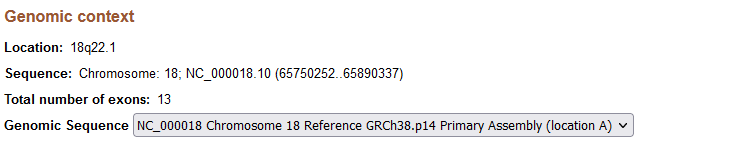

ans = 13
actually think it may be 12...

note: viewing the genes is failing on ncbi website, so cant see lengths

method = obtained from ncbi website

task 3 continued:
failed method: Wrote down the codes and lengths of each transcript's exons, where exons from different transcripts overlap / are the same I only count as one exon 
got a few too many exons (like 15?) and I'm fairly sure the answer should be no greater than 13 as that's what it's recorded as on NCBI.

Final method: detailed gene viewer on NCBI lets you cycle between exons for each transcript, recording the exons of the longest transcript as they encompass all the exons of the smaller transcripts. If time will return an make sure that the lengths for the first and last exon are accurate as they could be longer. The reason they could be longer is that they could be being cut off, like how in some of the other transcripts we get a fraction of an exon that appears in another transcript, the exons in the longest transcript might also have their beginning / end cut off.

Obtained from Ensembl: https://www.ensembl.org/Homo_sapiens/Transcript/Exons?db=core;g=ENSG00000081138;r=18:65750252-65890337;t=ENST00000397968


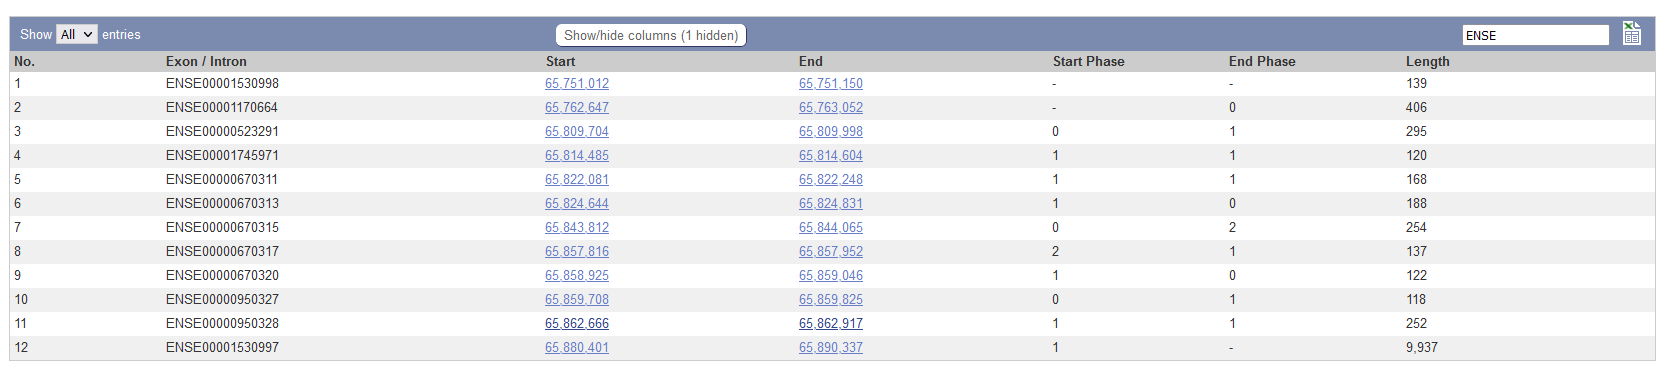

Longest Transcript = encodes the same protein as the three others, contains all the exons, verified this from NCBI gene viewer.

Note: the protein may not show all exons? so needs to be verified using the whole cdh7 gene on ncbi



# task 4

In [7]:
# longest transcript = NM_001362438.2
# shortest transcript = NM_001317214.3

transcript_ids = ["NM_001362438.2", "NM_001317214.3"]

handle = Entrez.efetch(db="nucleotide", id=transcript_ids[0], rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()
print("> exons lengths in NM_001362438.2:")
long_exons = [feature for feature in record.features if feature.type == 'exon']
for e in long_exons:
    print(len(e.location))
    
print('\n\n\n')

handle = Entrez.efetch(db="nucleotide", id=transcript_ids[1], rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()
print("> exons lengths in NM_001317214.3:")
short_exons = [feature for feature in record.features if feature.type == 'exon']
for e in short_exons:
    print(len(e.location))
    
print('\n\n\n')

# from this code we can see a missing exon (length=252)! Looking up in Ensembl for the exon name and other deets
# exon name = ENSE00000950328 (ensembl code)




> exons lengths in NM_001362438.2:
941
406
295
120
168
188
254
137
122
118
252
9937




> exons lengths in NM_001317214.3:
139
406
295
120
168
188
254
137
122
118
1460






# task 5
todo: need to look at the protein summary on ensembl for the different transcripts

todo: check with lloyd or fillipos if only missing a single exon


ENSE00000950328 == missing exon
maybe also missing the exons at the end of the sequence??


FUCK YEA, JSUT READ THE HINTS LITERATURE

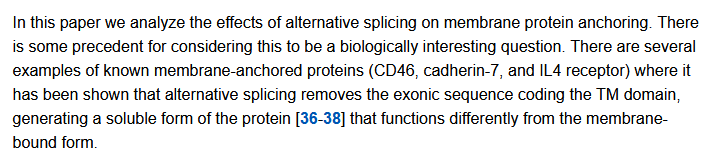

from hints section, references cadherin-7:
https://febs.onlinelibrary.wiley.com/doi/10.1016/S0014-5793(03)01354-1

in depth about cadherin-7 but in chickens:
https://www.sciencedirect.com/science/article/pii/S0021925819715075?pes=vor

Mentions the purpose? of soluble cadherin-7:
https://www.tandfonline.com/doi/full/10.4161/cam.27839
from paper: "The soluble isoform of cadherin-7 produced via alternative splicing inhibits full-length cadherin-7-mediated cell adhesion" when citing the above paper